In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
!ls

HT_result.xlsx    Untitled.ipynb    exported_data.csv


In [88]:
df = pd.read_excel('HT_result.xlsx', sheet_name='results')
df.shape

/opt/anaconda3/envs/ML/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/anaconda3/envs/ML/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


(96, 10)

In [89]:
df

,name,epochs,hidden_dims,learning_rate,neighbor_sampling_quantile,hidden_layers,num_hops,val Accuracy,test Accuracy,Runtime
0,Graph-Amazon_grid_epochs_5_hidden_dims_128_lea...,5,128,0.002,0.25,2,2,0.5610,0.5317,00:00:10
1,Graph-Amazon_grid_epochs_5_hidden_dims_128_lea...,5,128,0.002,0.50,2,2,0.5927,0.5778,00:00:10
2,Graph-Amazon_grid_epochs_5_hidden_dims_128_lea...,5,128,0.002,0.25,2,3,0.6780,0.6650,00:00:12
3,Graph-Amazon_grid_epochs_5_hidden_dims_128_lea...,5,128,0.002,0.50,2,3,0.7347,0.7261,00:00:13
4,Graph-Amazon_grid_epochs_5_hidden_dims_128_lea...,5,128,0.002,0.25,2,4,0.7560,0.7378,00:00:14
...,...,...,...,...,...,...,...,...,...,...
91,Graph-Amazon_grid_epochs_10_hidden_dims_256_le...,10,256,0.010,0.50,4,2,0.6644,0.6664,00:00:22
92,Graph-Amazon_grid_epochs_10_hidden_dims_256_le...,10,256,0.010,0.25,4,3,0.7098,0.6844,00:00:27
93,Graph-Amazon_grid_epochs_10_hidden_dims_256_le...,10,256,0.010,0.50,4,3,0.8091,0.7960,00:00:31
94,Graph-Amazon_grid_epochs_10_hidden_dims_256_le...,10,256,0.010,0.25,4,4,0.7120,0.6921,00:00:33


In [34]:
# epochs	
# hidden_dims
# neighbor_sampling_quantile
# hidden_layers
# num_hops

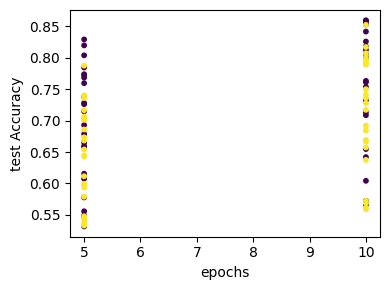

In [55]:
X_col = 'epochs'
Y_col = 'test Accuracy'
Color_col = 'learning_rate'

plt.figure(figsize=(4, 3))

# 色分けのためのカラーマップを設定
scatter = plt.scatter(df[X_col], df[Y_col], c=df[Color_col], cmap='viridis', s=10)

# カテゴリ 'A' を軸に表示するための処理
#plt.xticks(ticks=np.arange(len(df['epochs'].unique())), labels=df['epochs'].unique())

# カラーバーを追加
#cbar = plt.colorbar(scatter)
#cbar.set_label('X')

# グラフのラベルとタイトル
plt.xlabel(X_col)
plt.ylabel(Y_col)
#plt.title('Plot of Y vs A colored by X')

# グラフの表示
plt.tight_layout()
plt.show()

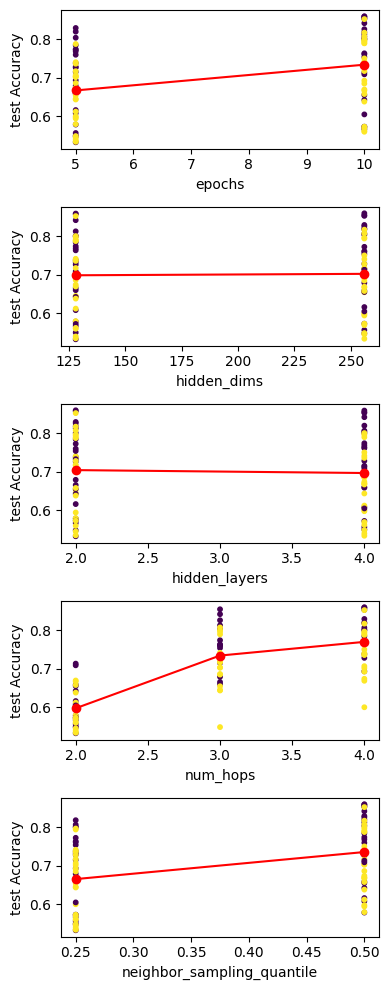

In [118]:
def plot_category_vs_Y(df, category_columns, numeric_column, color_column):
    """
    カテゴリカラムを横軸、数値カラムを縦軸、色分けカラムを色で分けたグラフを描画する関数。
    カテゴリカラムが複数指定されると、縦に並べて表示する。
    
    Parameters:
    df (pd.DataFrame): プロットするデータフレーム
    category_columns (list of str): 横軸にしたいカテゴリカラムのリスト
    numeric_column (str): 縦軸にしたい数値カラムの名前
    color_column (str): 色分けしたいカラムの名前
    """
    
    num_plots = len(category_columns)
    
    # サブプロットを縦に並べる
    fig, axes = plt.subplots(num_plots, 1, figsize=(4, 2*num_plots), sharey=True)
    
    if num_plots == 1:
        axes = [axes]  # サブプロットが1つの場合、axesをリストにする
    
    for i, col in enumerate(category_columns):
        
        # 散布図の描画
        scatter = axes[i].scatter(df[col], df[numeric_column], c=df[color_column], cmap='viridis', s=10)

        # 平均値のプロット
        mean_values = df.groupby(col)[numeric_column].mean()
        categories_unique = df[col].unique()
        axes[i].plot(categories_unique, mean_values, color='red', marker='o', linestyle='-', label='Mean') 
        
        # ラベル
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(numeric_column)
    
    # レイアウト調整
    plt.tight_layout()
    plt.show()

plot_category_vs_Y(df, ['epochs','hidden_dims','hidden_layers', 'num_hops', 'neighbor_sampling_quantile'], 
                   'test Accuracy', 'learning_rate')

# 色分けは'learning_rate'

In [60]:
df.groupby('epochs')['test Accuracy'].agg(['mean', 'std']).T

epochs,5,10
mean,0.666575,0.733525
std,0.086601,0.095458


In [119]:
for c in ['epochs','hidden_dims','hidden_layers', 'num_hops', 'neighbor_sampling_quantile']:
    display(df.groupby(c)['test Accuracy'].agg(['mean', 'max']).T)

epochs,5,10
mean,0.666575,0.733525
max,0.829000,0.859400


hidden_dims,128,256
mean,0.69819,0.70191
max,0.85870,0.85940


hidden_layers,2,4
mean,0.703823,0.696277
max,0.859400,0.858700


num_hops,2,3,4
mean,0.596816,0.733872,0.769463
max,0.712900,0.854300,0.859400


neighbor_sampling_quantile,0.25,0.50
mean,0.664867,0.735233
max,0.818000,0.859400


In [120]:
for col in ['epochs','hidden_dims','hidden_layers', 'num_hops', 'neighbor_sampling_quantile']:
    groups = [df[df[col] == group]['test Accuracy'] for group in df[col].unique()]
    
    # ANOVAの実施
    f_stat, p_value = stats.f_oneway(*groups)
    
    print(f"カテゴリカルカラム: {col}")
    print(f"F統計量: {f_stat}, p値: {p_value}\n")

カテゴリカルカラム: epochs
F統計量: 12.951586143923391, p値: 0.0005124010304775797

カテゴリカルカラム: hidden_dims
F統計量: 0.03517266913791557, p値: 0.8516385330301565

カテゴリカルカラム: hidden_layers
F統計量: 0.14482563409345303, p値: 0.704388675627718

カテゴリカルカラム: num_hops
F統計量: 69.36469231654249, p値: 3.654563981678485e-19

カテゴリカルカラム: neighbor_sampling_quantile
F統計量: 14.516591943356156, p値: 0.000247839832977772

